# CNC - Anomaly Detection

## Project Description

1000 Parts were produced by 3 different CNC machines. The two important dimensions (X1, and X2) are measured. The parts are all mixed and have not been identified by which machine have been produced. First, try to see if there are any cluster patterns; then try to identify the anomalies with each machine (the 5% of parts in which their dimensions are different from the majority of the parts produced by the same machine); it will help the engineer to analyze each machine separately; so he could diagnose the issues with each CNC machines.

## Making Some Data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv('CNCMeasureData.csv')
dataset

,Dimension 1 (mm),Dimension 2 (mm)
0,100.82,101.33
1,100.29,101.30
2,98.10,99.99
3,100.42,101.03
4,97.24,99.84
...,...,...
1245,102.94,99.82
1246,101.78,102.37
1247,103.01,101.10
1248,104.63,101.77


In [11]:
X = dataset.iloc[:, [0, 1]].values

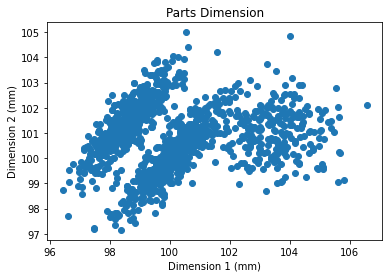

In [14]:
plt.scatter(X[:,0],X[:,1])
plt.title('Parts Dimension')
plt.xlabel('Dimension 1 (mm)')
plt.ylabel('Dimension 2 (mm)')
plt.show()

## Anomaly Detection using Gaussian Mixtures

### Gaussian Mix Model 

In [16]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=3, n_init=10, random_state=42)
GMM.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [17]:
Centers=GMM.means_
Centers

array([[100.05201004, 100.0756432 ],
       [ 98.59229639, 101.42710696],
       [103.40068309, 101.0595911 ]])

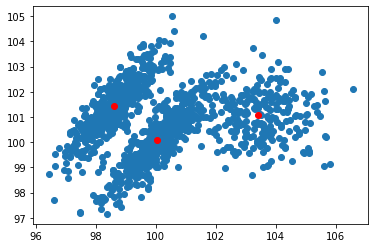

In [23]:
plt.scatter(X[:,0],X[:,1])

plt.scatter(Centers[:,0],Centers[:,1], c='red' )


In [26]:
y_GM =GMM.predict(X)

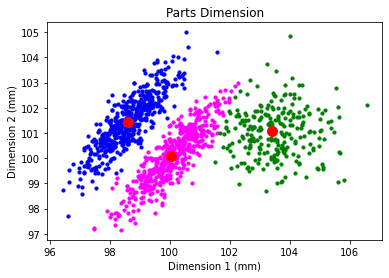

In [29]:
plt.scatter(X[y_GM == 0, 0], X[y_GM == 0, 1], s = 10, c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_GM == 1, 0], X[y_GM == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_GM == 2, 0], X[y_GM == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(Centers[:,0],Centers[:,1], s = 100, c = 'red', label = 'Centroids')

plt.title('Parts Dimension')
plt.xlabel('Dimension 1 (mm)')
plt.ylabel('Dimension 2 (mm)')
plt.show()

### Anomaly Detection
Gaussian Mixtures can be used for anomaly detection: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 5%, then you can set the density threshold to be the value that results in having 5% of the instances located in areas below that threshold density:

In [30]:
densities = GMM.score_samples(X)
density_threshold = np.percentile(densities, 5)
anomalies = X[densities < density_threshold]

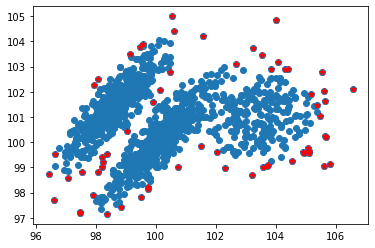

In [36]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.show()